In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
  

In [2]:
train=pd.read_csv('train.csv')


In [3]:
test=pd.read_csv('test.csv')

In [4]:
test


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [5]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatise=  WordNetLemmatizer()

In [7]:
train['label'].value_counts()


0    29720
1     2242
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

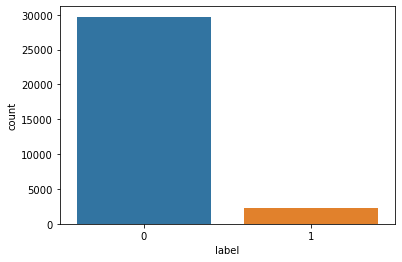

In [8]:
sns.countplot(data=train,x='label')# 0 is present more in number 

In [9]:
length=[]
for i in range(len(train)):
    length.append(len(train['tweet'][i]))

In [10]:
train['length of sentence']=length

In [11]:
train

,id,label,tweet,length of sentence
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,68
31958,31959,0,to see nina turner on the airwaves trying to...,131
31959,31960,0,listening to sad songs on a monday morning otw...,63
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",67


<AxesSubplot:xlabel='length of sentence', ylabel='Count'>

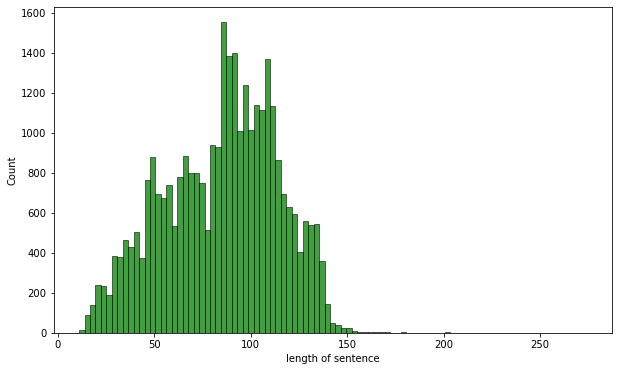

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data=train,x='length of sentence',color='green')

C:\Users\madhu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length of sentence', ylabel='Density'>

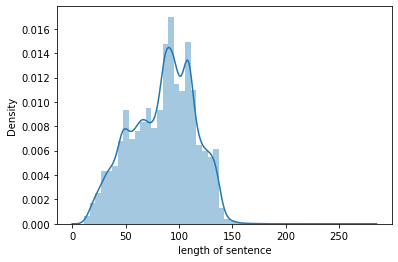

In [13]:
sns.distplot(train['length of sentence'])

In [23]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
cleaned_text=[]
for i in range(0,len(train)):
    text=re.sub('[^a-zA-Z]',' ',train['tweet'][i])
    text=text.lower()
    text=text.split()
    text=[stemmer.stem(j) for j in text if not j in set(stopwords.words('english'))]
    text=' '.join(text)
    cleaned_text.append(text)

In [20]:
cleaned_text[0:10]

['user father dysfunct selfish drag kid dysfunct run',
 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank',
 'bihday majesti',
 'model love u take u time ur',
 'factsguid societi motiv',
 'huge fan fare big talk leav chao pay disput get allshowandnogo',
 'user camp tomorrow user user user user user user user danni',
 'next school year year exam think school exam hate imagin actorslif revolutionschool girl',
 'love land allin cav champion cleveland clevelandcavali',
 'user user welcom gr']

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(cleaned_text).toarray() 

In [25]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
Y=train[['label']]
Y

,label
0,0
1,0
2,0
3,0
4,0
...,...
31957,0
31958,0
31959,0
31960,1


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=0)

In [28]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(x_train,y_train)
y_test_predict=model.predict(x_test)

C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [29]:
y_test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_test_predict)
accuracy

0.9406611742621754

In [31]:
sentence=train['tweet'].to_list()

In [32]:
sentence[0:10]

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! "]

In [33]:
joined_sentence=' '.join(sentence)

In [34]:
!pip install WordCloud
from wordcloud import WordCloud

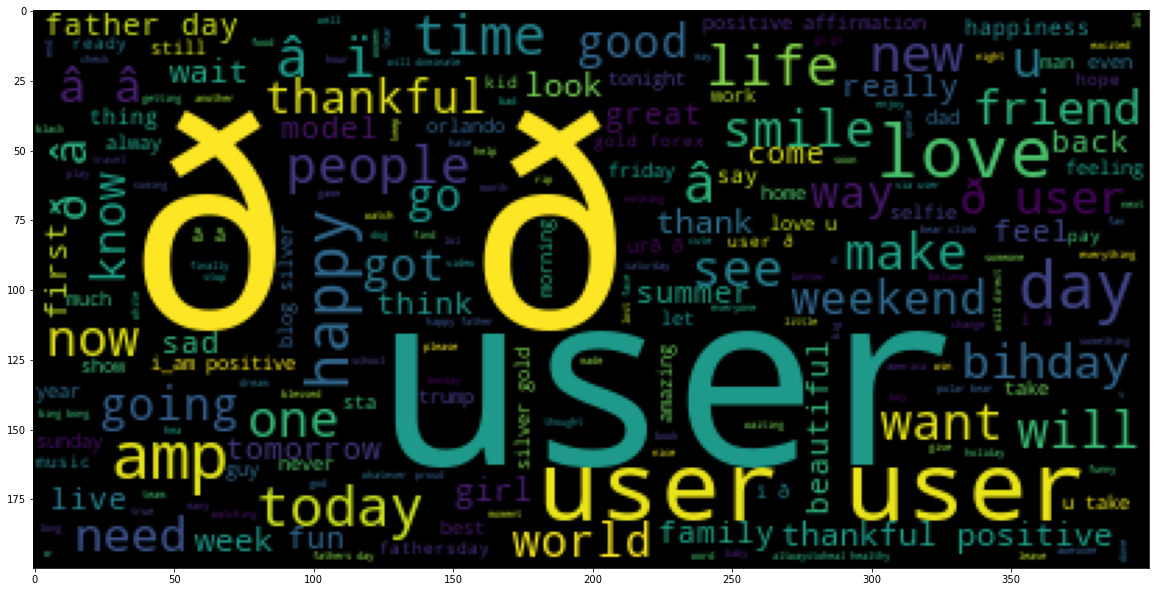

In [35]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(joined_sentence))

In [36]:
positive=train[train['label']==0]
positive

,id,label,tweet,length of sentence
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
...,...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,61
31957,31958,0,ate @user isz that youuu?ðððððð...,68
31958,31959,0,to see nina turner on the airwaves trying to...,131
31959,31960,0,listening to sad songs on a monday morning otw...,63


In [37]:
negative = train[train['label']==1]
negative

,id,label,tweet,length of sentence
13,14,1,@user #cnn calls #michigan middle school 'buil...,74
14,15,1,no comment! in #australia #opkillingbay #se...,101
17,18,1,retweet if you agree!,22
23,24,1,@user @user lumpy says i am a . prove it lumpy.,47
34,35,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,31948,1,@user @user you don't have the balls to hashta...,112
31948,31949,1,"makes you ask yourself, who am i? then am i a...",87


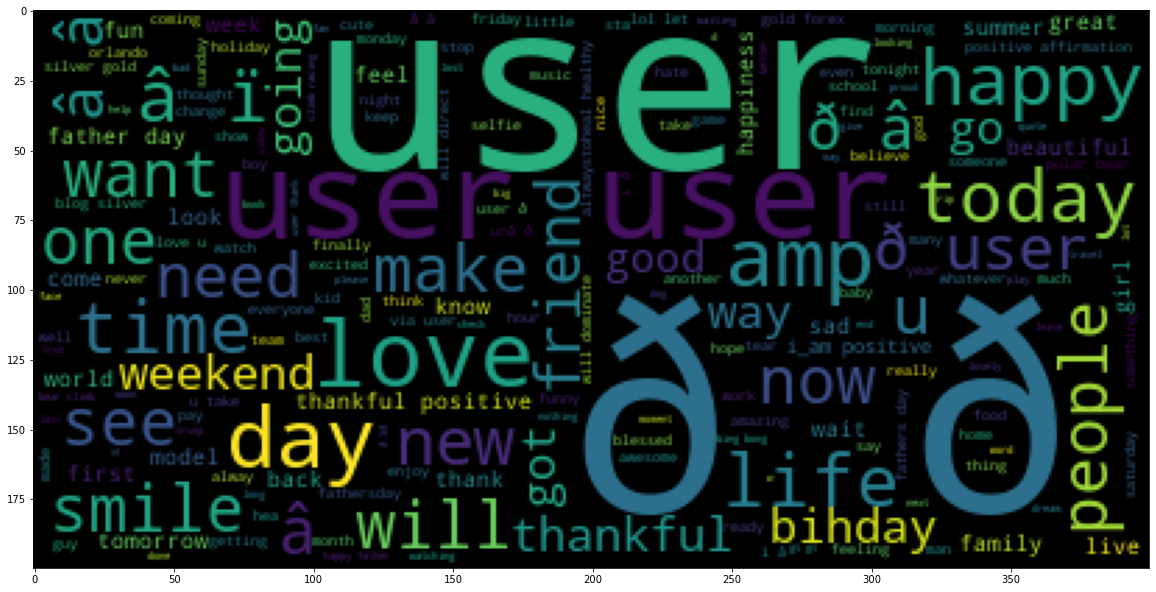

In [38]:
# Plot the WorldCloud for positive words
positive_sentences = positive['tweet'].to_list()
single_positive = ' '.join(positive_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_positive))

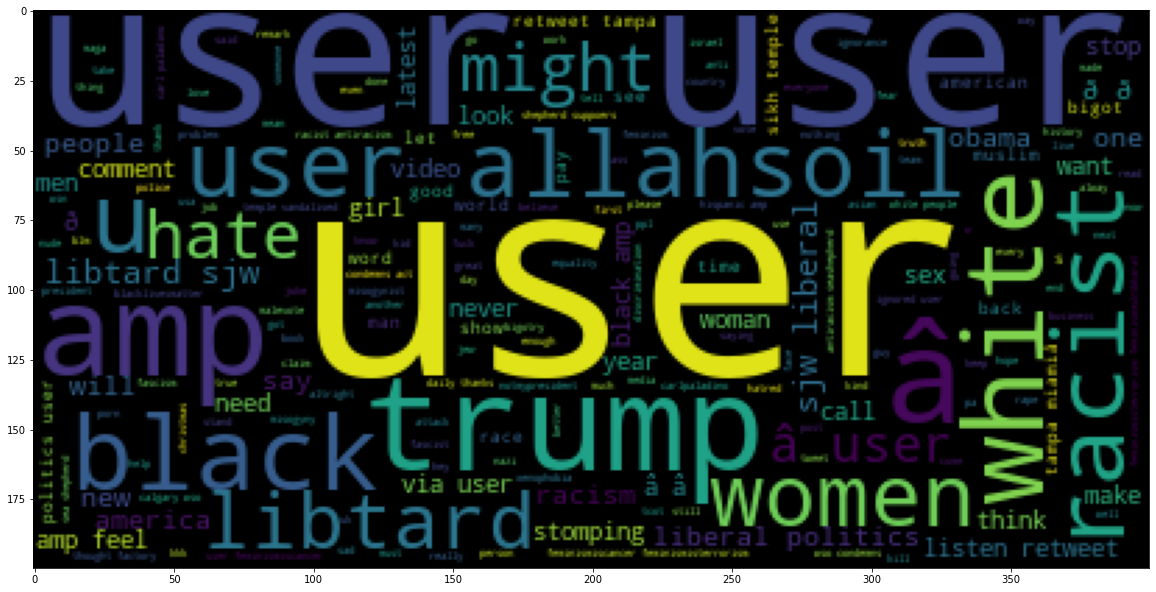

In [39]:
# Plot the WorldCloud for negative words
negative_sentences = negative['tweet'].to_list()
single_negative = ' '.join(negative_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_negative))